### RandomForest Model

In [86]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [21]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [71]:
def TracePlot(model, input_X, input_y, input_color = None, max_range = 800):
    plt.figure(figsize = (16,6))

    plot_x1 = np.arange(0,len(input_y))
    plt.plot(plot_x1, input_y)

    plt.plot(plot_x1, model.predict(input_X), color = input_color)

    plt.xlim(0,max_range)
    plt.legend()
    plt.show()

In [3]:
df1 = pd.read_pickle('./data_psm_pkls/Santa_Monica_2015_14yearsprior_30min.pkl')
df2 = pd.read_pickle('./data_psm_pkls/Santa_Monica_2016_14yearsprior_30min.pkl')

difference1 = set(df1.columns) - set(df2.columns)

difference2 = set(df2.columns) - set(df1.columns)

for item in difference1:
    df2[item] = np.zeros(df2.shape[0])
    
for item in difference2:
    df1[item] = np.zeros(df2.shape[0])

In [4]:
set(df1.columns) - set(df2.columns)

set()

In [5]:
set(df2.columns) - set(df1.columns)

set()

In [6]:
df1.shape, df2.shape

((17520, 58), (17520, 58))

In [77]:
X_train = df1.drop('Target_DNI', axis = 1)
y_train = df1['Target_DNI'].copy().values

X_test = df2.drop('Target_DNI', axis = 1)
y_test = df2['Target_DNI'].copy().values

In [8]:
forest = RandomForestRegressor(n_estimators=100,
                               min_samples_split = 10,
                               criterion='mse',
                              min_samples_leaf = 5,
                              max_features = 0.5,
                              max_depth = None)

forest_params = {
    'max_depth' : [5,10],
}

### Previously used this parameters for tuning the GS on a remote machine ###

# forest_params = {
#     'max_depth' : [5,10, 20, None],
#     'n_estimators': [50, 100, 200, 300],
#     'criterion': ['mse', 'mae'],
#     'max_features': [0.25, 0.5, 1.0],
#     'min_samples_split': [2, 5, 10, 20, 30],
#     'min_samples_leaf': [1,3, 5, 7, 10]

rs_forest = GridSearchCV(forest, forest_params, cv = 3, verbose=3, n_jobs = 3)
rs_forest.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] ............ max_depth=5, score=0.5873534824892657, total=   4.7s
[CV] max_depth=10 ....................................................
[CV] ............. max_depth=5, score=0.732853305104632, total=   5.1s
[CV] max_depth=10 ....................................................
[CV] ............ max_depth=5, score=0.7954017780484937, total=   5.1s
[CV] max_depth=10 ....................................................
[CV] ........... max_depth=10, score=0.5863122120406292, total=   7.2s


[Parallel(n_jobs=3)]: Done   4 out of   6 | elapsed:   12.5s remaining:    6.2s


[CV] ........... max_depth=10, score=0.7141337342738331, total=   8.0s
[CV] ........... max_depth=10, score=0.7903005300593368, total=   7.9s


[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:   13.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'max_depth': [5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

In [9]:
rs_forest.best_score_

0.7052028552141305

In [10]:
rs_forest.score(X_train, y_train)

0.7546502567612074

In [11]:
rs_forest.score(X_test, y_test)

0.7309077083793849

In [12]:
tuned_rf = RandomForestRegressor(n_estimators=100,
                               min_samples_split = 10,
                               criterion='mse',
                              min_samples_leaf = 5,
                              max_features = 0.5,
                              max_depth = None,
                                verbose = 3)

tuned_rf.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=3, warm_start=False)

In [13]:
tuned_rf.predict(X_train)

array([0.00109702, 0.00109702, 0.00109702, ..., 0.00109702, 0.00109702,
       0.00109702])

In [14]:
r2_score(y_train, tuned_rf.predict(X_train)), tuned_rf(y_test, rs_forest.predict(X_test))

(0.7546502567612074, 0.7309077083793849)

In [ ]:
joblib.dump(tuned_rf, '../sklearn_models/RF_tuned.pkl')

In [15]:
pd.DataFrame({
    "Features": X_train.columns,
    "Importance": rs_forest.best_estimator_.feature_importances_
}
).sort_values(by = 'Importance', ascending = False)

,Features,Importance
49,t-13_Clearsky DNI,1.743071e-01
9,t-3_Clearsky DNI,1.544092e-01
25,t-7_Clearsky DNI,1.492384e-01
13,t-4_Clearsky DNI,1.334422e-01
37,t-10_Clearsky DNI,1.139884e-01
53,t-14_Clearsky DNI,9.201907e-02
41,t-11_Clearsky DNI,3.729452e-02
0,Solar Zenith Angle,3.596047e-02
17,t-5_Clearsky DNI,2.887171e-02
21,t-6_Clearsky DNI,1.871559e-02


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


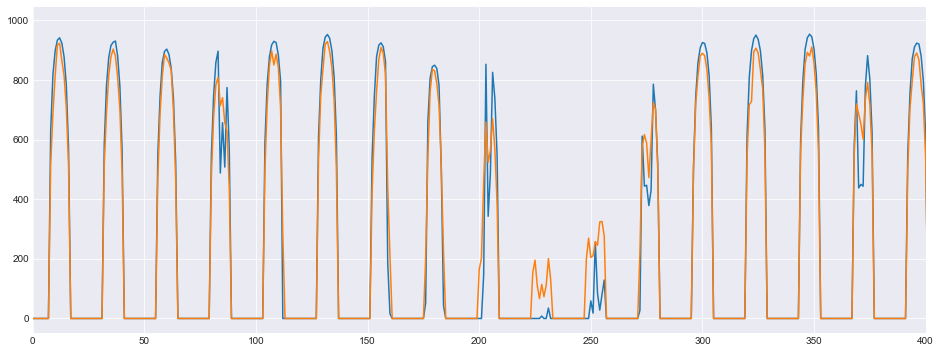

In [80]:
TracePlot(tuned_rf, X_train, y_train, input_color = None, max_range = 400)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


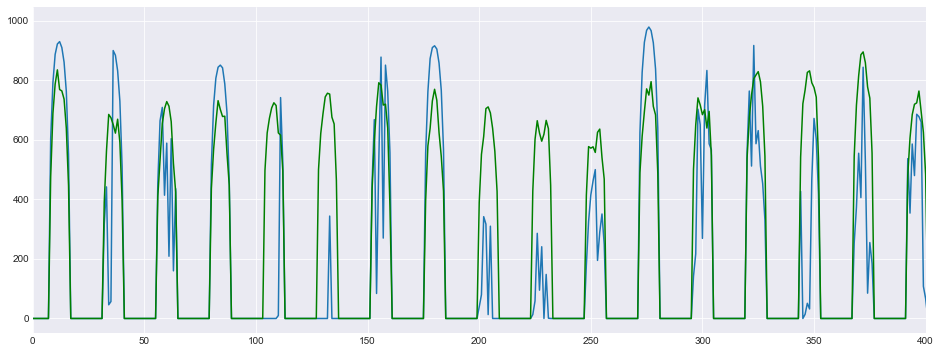

In [81]:
TracePlot(tuned_rf, X_test, y_test, input_color = 'green', max_range = 400)

In [19]:
X_train.head()

,Solar Zenith Angle,t-1_Clearsky DNI,t-1_Clearsky DHI,t-1_Relative Humidity,t-1_Cloud Type,t-2_Clearsky DNI,t-2_Clearsky DHI,t-2_Relative Humidity,t-2_Cloud Type,t-3_Clearsky DNI,...,t-12_Relative Humidity,t-12_Cloud Type,t-13_Clearsky DNI,t-13_Clearsky DHI,t-13_Relative Humidity,t-13_Cloud Type,t-14_Clearsky DNI,t-14_Clearsky DHI,t-14_Relative Humidity,t-14_Cloud Type
Timestamp,,,,,,,,,,,,,,,,,,,,,
1-1 0:0,168.98,0,0,47.07,0,0,0,100.0,0,0,...,41.59,1,0,0,54.18,0,0,0,54.72,1
1-1 0:30,166.86,0,0,47.07,0,0,0,100.0,0,0,...,44.41,1,0,0,58.03,0,0,0,58.51,1
1-1 1:0,162.40,0,0,46.52,0,0,0,100.0,0,0,...,43.78,0,0,0,56.23,0,0,0,54.95,1
1-1 1:30,156.92,0,0,46.52,0,0,0,100.0,0,0,...,43.78,1,0,0,60.25,0,0,0,54.95,1
1-1 2:0,151.01,0,0,45.75,0,0,0,100.0,0,0,...,43.42,1,0,0,59.31,0,0,0,51.60,1


In [23]:
pca = PCA(n_components = 5)
ss = StandardScaler()

X_train_new = ss.fit_transform(X_train)
X_test_new = ss.transform(X_test)

X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)


forest = RandomForestRegressor(n_estimators=100,
                               min_samples_split = 2,
#                                criterion='mae',
                              min_samples_leaf = 1,
                              max_features = 1.0,
                              max_depth = 10)

forest_params = {
#     'max_depth' : [5,10],
    'criterion' : ['mse','mae']
}

rs_forest = GridSearchCV(forest, forest_params, cv = 3, verbose=2, n_jobs = 3)
rs_forest.fit(X_train_new, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] criterion=mse ...................................................
[CV] criterion=mse ...................................................
[CV] criterion=mse ...................................................
[CV] .................................... criterion=mse, total=   2.7s
[CV] criterion=mae ...................................................
[CV] .................................... criterion=mse, total=   3.1s
[CV] criterion=mae ...................................................
[CV] .................................... criterion=mse, total=   3.0s
[CV] criterion=mae ...................................................
[CV] .................................... criterion=mae, total= 5.7min
[CV] .................................... criterion=mae, total= 5.7min
[CV] .................................... criterion=mae, total= 5.9min


[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:  6.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=1.0, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'criterion': ['mse', 'mae']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=2)

In [24]:
joblib.dump(rs_forest, 'PCA_RF_n5.pkl') 

r2_score(y_train, rs_forest.predict(X_train_new)), r2_score(y_test, rs_forest.predict(X_test_new))

(0.8363594755479467, 0.7068745392612008)

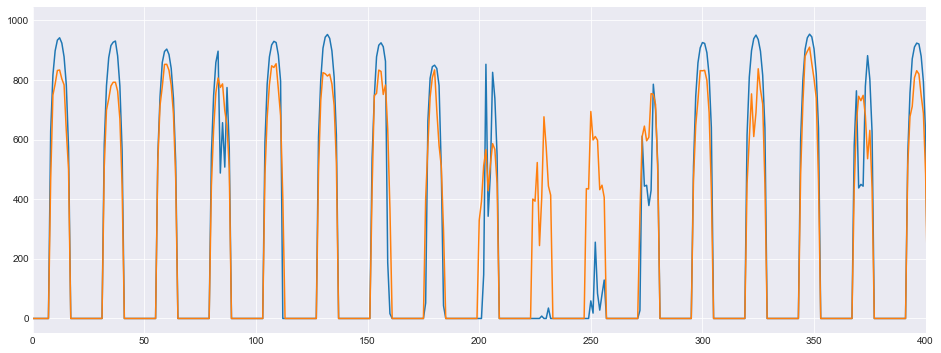

In [84]:
TracePlot(forest, X_train_new, y_train, input_color = None, max_range = 400)

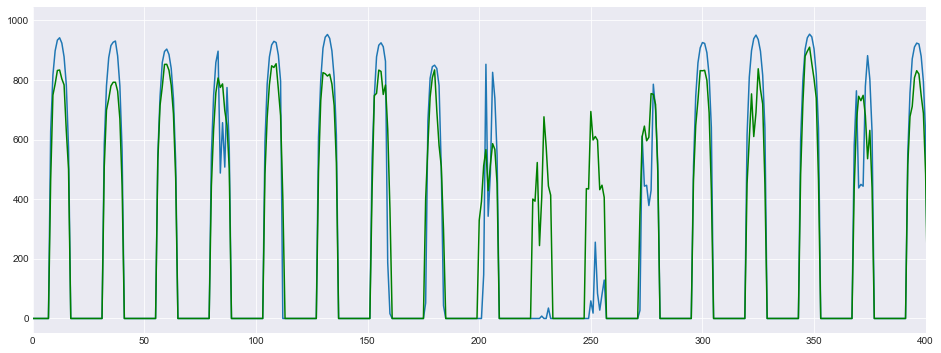

In [85]:
TracePlot(forest, X_train_new, y_train, input_color = 'green', max_range = 400)

In [48]:
from xgboost import XGBRegressor

from sklearn.externals import joblib

gs_xgbtree = joblib.load('./sklearn_models/GS_RF_50f.pkl') 

In [ ]:
### Tuned on remote machine with this code snippet: ###

# X = df1.drop('Target_DNI', axis = 1)
# y = df1['Target_DNI'].copy().values

# split = int(X.shape[0]/2)

# X_train = X[:split]
# y_train = y[:split]

# X_test = X[split:]
# y_test = y[split:]


# xgbtree = XGBRegressor(booster = 'gbtree', n_jobs = -1)

# xgbtree_params = {
#     'max_depth' : [5, 10],
#     'learning_rate': [0.1, 0.01],
#     'gamma': [0, 0.5],
#     'n_estimators': [50, 100],
#     'min_child_weight': [1,10],
#     'max_delta_step': [0, 1],
#     'subsample': [0.5, 1.0],
#     'reg_alpha': [0, 0.1],
#     'reg_lambda': [0, 0.1]
#     }

# gs_xgbtree = GridSearchCV(xgbtree, xgbtree_params, cv = 3, verbose=3, n_jobs = -1)
# gs_xgbtree.fit(X_train, y_train)

# r2_score(y_train, gs_xgbtree.predict(X_train)), r2_score(y_test, gs_xgbtree.predict(X_test))

In [50]:
gs_xgbtree.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
gs_xgbtree_best_params

{'gamma': 0.5,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 50,
 'reg_alpha': 0.1,
 'reg_lambda': 0,
 'subsample': 0.5}

In [55]:
gs_xgbtree.score(X_train, y_train),gs_xgbtree.score(X_test, y_test)

(0.755734742341863, 0.7268082138431136)

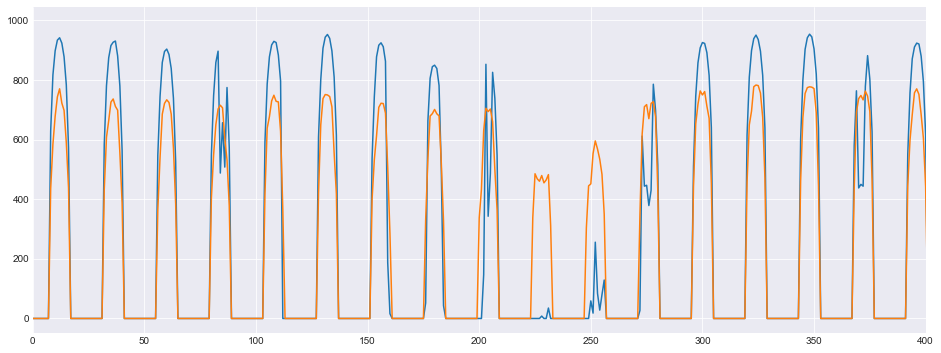

In [73]:
TracePlot(gs_xgbtree, X_train, y_train, max_range = 400)

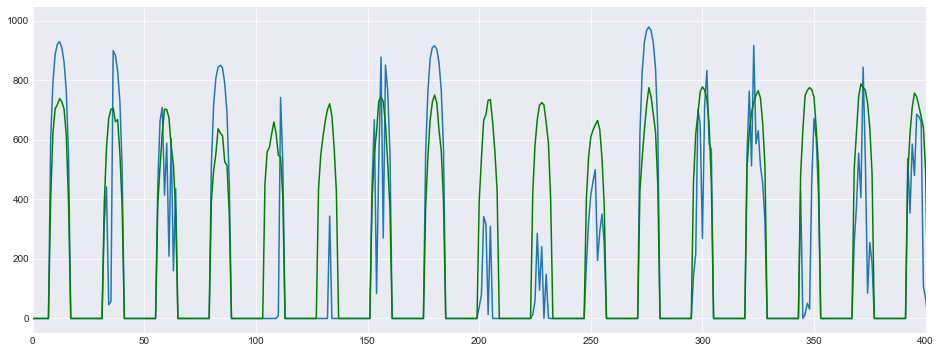

In [72]:
TracePlot(gs_xgbtree, X_test, y_test, input_color = 'green', max_range = 400)